In [ ]:
# Furniture Dataset Analytics
# This notebook explores the product dataset used in the recommendation system.
# We'll extract key insights such as brand distribution, category breakdown, price ranges, and material usage.


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Products.csv to Products.csv


In [ ]:
import pandas as pd

# Load the uploaded CSV
df = pd.read_csv("Products.csv")

# Preview the first few rows
df.head()


,title,brand,description,price,categories,images,manufacturer,package_dimensions,country_of_origin,material,color,uniq_id
0,"GOYMFK 1pc Free Standing Shoe Rack, Multi-laye...",GOYMFK,"multiple shoes, coats, hats, and other items E...",$24.99,"['Home & Kitchen', 'Storage & Organization', '...",['https://m.media-amazon.com/images/I/416WaLx1...,GOYMFK,"2.36""D x 7.87""W x 21.6""H",China,Metal,White,02593e81-5c09-5069-8516-b0b29f439ded
1,"subrtex Leather ding Room, Dining Chairs Set o...",subrtex,subrtex Dining chairs Set of 2,NaN,"['Home & Kitchen', 'Furniture', 'Dining Room F...",['https://m.media-amazon.com/images/I/31SejUEW...,Subrtex Houseware INC,"18.5""D x 16""W x 35""H",NaN,Sponge,Black,5938d217-b8c5-5d3e-b1cf-e28e340f292e
2,Plant Repotting Mat MUYETOL Waterproof Transpl...,MUYETOL,NaN,$5.98,"['Patio, Lawn & Garden', 'Outdoor Décor', 'Doo...",['https://m.media-amazon.com/images/I/41RgefVq...,MUYETOL,"26.8""L x 26.8""W",NaN,Polyethylene,Green,b2ede786-3f51-5a45-9a5b-bcf856958cd8
3,"Pickleball Doormat, Welcome Doormat Absorbent ...",VEWETOL,The decorative doormat features a subtle textu...,$13.99,"['Patio, Lawn & Garden', 'Outdoor Décor', 'Doo...",['https://m.media-amazon.com/images/I/61vz1Igl...,Contrence,"24""L x 16""W",NaN,Rubber,A5589,8fd9377b-cfa6-5f10-835c-6b8eca2816b5
4,JOIN IRON Foldable TV Trays for Eating Set of ...,JOIN IRON Store,Set of Four Folding Trays With Matching Storag...,$89.99,"['Home & Kitchen', 'Furniture', 'Game & Recrea...",['https://m.media-amazon.com/images/I/41p4d4VJ...,NaN,"18.9""D x 14.2""W x 26""H",NaN,Iron,Grey Set of 4,bdc9aa30-9439-50dc-8e89-213ea211d66a


In [ ]:
# Total products and products with price
total_products = len(df)
with_price = df["price"].notnull().sum()

print(f"Total products: {total_products}")
print(f"Products with price: {with_price}")


Total products: 312
Products with price: 215


In [ ]:
# Remove $ and commas, convert to float
df["clean_price"] = df["price"].str.replace("$", "").str.replace(",", "").astype(float)

# Describe price stats
df["clean_price"].describe()


,clean_price
count,215.000000
mean,67.630651
std,57.962150
min,0.600000
25%,24.990000
50%,53.990000
75%,89.990000
max,349.000000


<Axes: title={'center': 'Top Brands'}, xlabel='brand'>

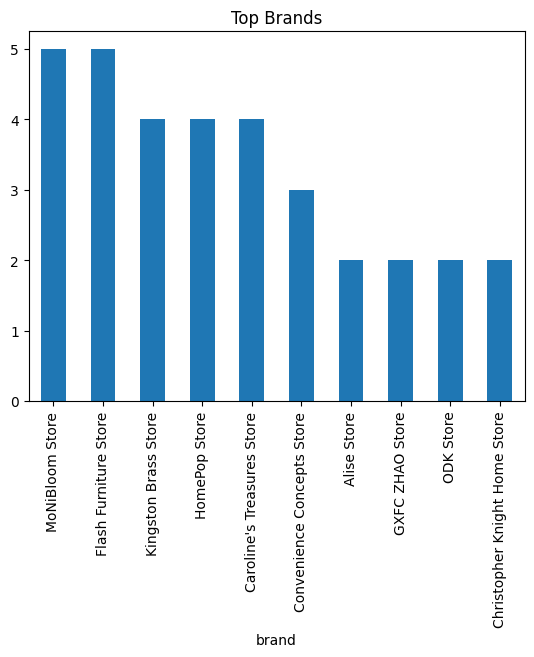

In [ ]:
# Top 10 brands
df["brand"].value_counts().head(10).plot(kind="bar", title="Top Brands")


<Axes: title={'center': 'Top Categories'}>

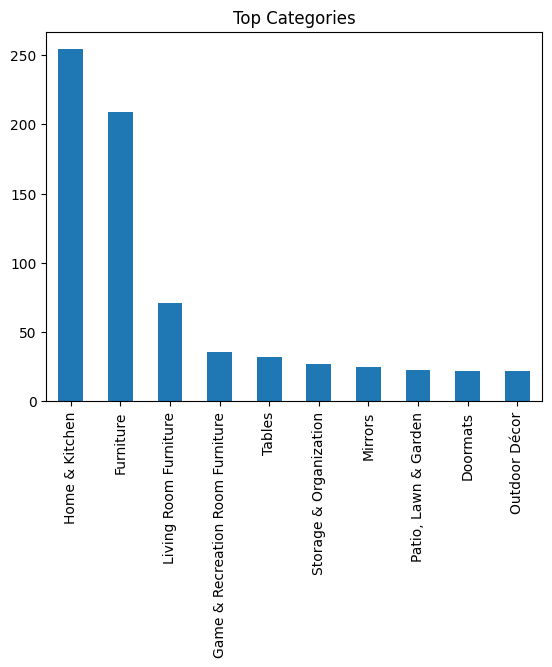

In [ ]:
import ast
from collections import Counter

# Parse category lists
df["categories_list"] = df["categories"].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else [])

# Flatten and count
all_categories = [cat for sublist in df["categories_list"] for cat in sublist]
category_counts = Counter(all_categories)

# Show top categories
pd.Series(category_counts).sort_values(ascending=False).head(10).plot(kind="bar", title="Top Categories")



<Axes: title={'center': 'Top Colors'}, xlabel='color'>

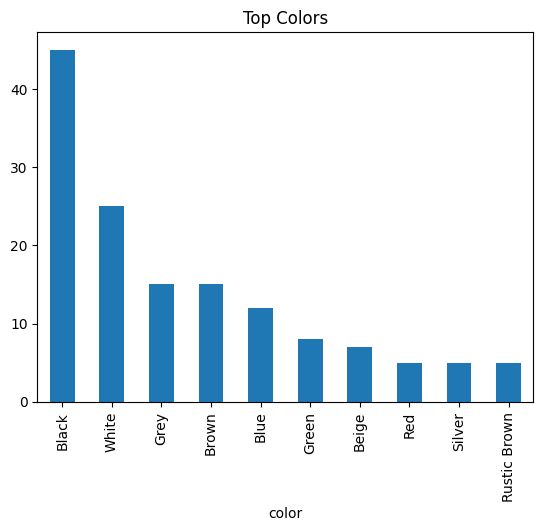

In [ ]:
df["material"].value_counts().head(10).plot(kind="bar", title="Top Materials")
df["color"].value_counts().head(10).plot(kind="bar", title="Top Colors")


<Axes: title={'center': 'Price Buckets'}, xlabel='price_bucket'>

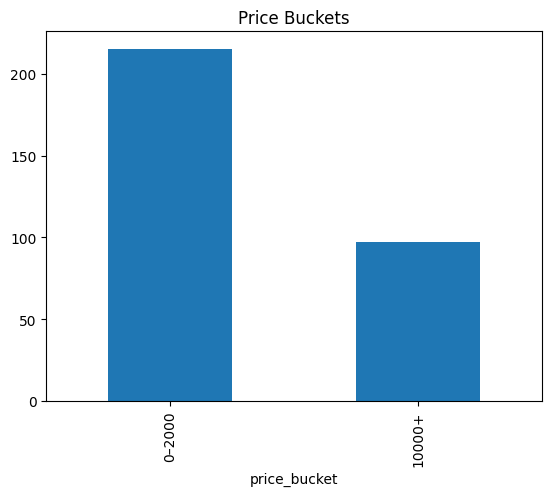

In [ ]:
def bucket_price(p):
    if p < 2000: return "0–2000"
    elif p < 5000: return "2000–5000"
    elif p < 10000: return "5000–10000"
    else: return "10000+"

df["price_bucket"] = df["clean_price"].apply(bucket_price)
df["price_bucket"].value_counts().plot(kind="bar", title="Price Buckets")


In [ ]:
print("✅ Analytics complete. Key insights extracted from brand, category, price, material, and color dimensions.")


✅ Analytics complete. Key insights extracted from brand, category, price, material, and color dimensions.
